# Lab 1

First off, I shall create a cell to import some useful pieces, that way I do not forget to do so later when I need it.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## A little statistics

### 1B. Integrating the standard normal distribution.
First, I shall use the stats.norm.cdf() error function. I will also display the z table value found on wikipedia (the link provided in the lab instructions).

In [3]:
#       error function       z-table
print(str(stats.norm.cdf(0)) + " = 0.5")
print(str(stats.norm.cdf(0.6)) + " = 0.72575")
print(str(stats.norm.cdf(1)) + " = 0.84134")

0.5 = 0.5
0.7257468822499265 = 0.72575
0.8413447460685429 = 0.84134


### 1C. The other way.

I shall now use stats.norm.ppf() to show the sigma value of a given probability. I shall choose probabilities associated with 1, 2, and 5 sigma.

In [4]:
print(str(stats.norm.ppf(0.84134)) + " = 1 sigma")
print(str(stats.norm.ppf(0.97725)) + " = 2 sigma")
print(str(stats.norm.ppf(0.9999997133484281)) + " = 5 sigma")

0.9999803859660787 = 1 sigma
2.0000024438996027 = 2 sigma
4.999999999970176 = 5 sigma


### 1D. Explaining the negatives

We are integrating from infinity to the sigma value we give, which goes to zero at probabilities of 50%. This 50% indicates that there is a 1/2 chance a event will be on eitherside of that probability. This is what 0 sigma means, that we are at the mean value for the distribution. For sigmas reporting as negative, we can interpret the values differently, knowing that a "negative" sigma is actually just sigma away from the mean on the left side of the mean, rather than the right. The negative sign merely shows which side of the mean the sigma is on.

### 2. A different distribution

Make both the analytic pdf() and a relization with ~100k samples using a built-in distribution. I shall choose the exponential distribution.

The exponential distribution is a special case of the gamma distribution, 
with *a = 1*. The scipy function is stats.gamma.rvs(1, samples) for our purposes.

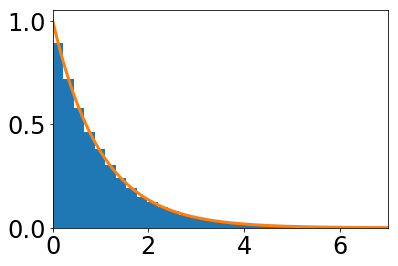

In [5]:
samples = stats.gamma.rvs(1, size = 100000)

fig, ax = plt.subplots(1, 1)

#Data is the samples in 50 rectangles with a total area of 1
ax.hist(samples, bins=50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0, 7])
x = np.linspace(0, 7, 1000)
ax.plot(x, stats.gamma.pdf(x, 1), linewidth = 3, alpha = 1)

### 3. Signal-free distribution

You have a measurement for which you need to decide 'sigma'.

### 3A. Select a value for your hypothetical measurement.

I shall choose the value 4.2, for it is The Answer divided by 10.

### 3B. Statistical question

For the given measurement, find the probability that the measurement is not noise. 

### 3C. Convert to math

Integral_(measurement value) ^(infinity) (exponential function) dx

### 4D. and 4E. Calculate probability and Sigma

In [7]:
measurement = 4.2
probability = stats.gamma.cdf(measurement, 1)
print(str(100*probability) + "% probability of signal")
#Calculate sigma on a normal with the probability
sigma = stats.norm.ppf(probability)
print(str(sigma) + " sigma")

98.50044231795223% probability of signal
2.170207190096744 sigma


In [8]:
measurements = np.linspace(0, 7, 71)
for _idx in range(0, len(measurements)):
    print("Measurement: " + str(measurements[_idx]))
    prob = stats.gamma.cdf(measurements[_idx], 1)
    print(str(100*probability) + "% probability of signal")
    sigma = stats.norm.ppf(probability)
    print(str(sigma) + " sigma \n")

print("Measurements complete")

Measurement: 0.0
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.1
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.2
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.30000000000000004
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.4
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.5
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.6000000000000001
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.7000000000000001
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.8
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 0.9
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 1.0
98.50044231795223% probability of signal
2.170207190096744 sigma 

Measurement: 1.1
98.5004423179

## Non-Continuous Distributions

The non-continuous distribution I am going to investigate is the binomial distribution. This distribution has the parameters n and p, where n is the number of trials something occurs and p is the success probability per trial. 

### 1B. Some plots

Lets see some plots of the poisson with different parameters:

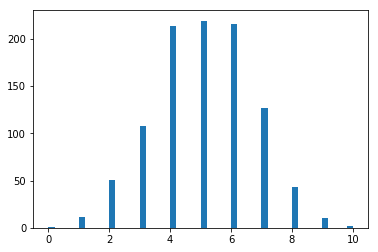

In [75]:
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)
#For n=10 trials and p=0.5 percent success for 1000 samples
samples = binom.rvs(n=10, p=0.5, size=1000)
ax.hist(samples, bins=50); #Silence output to console

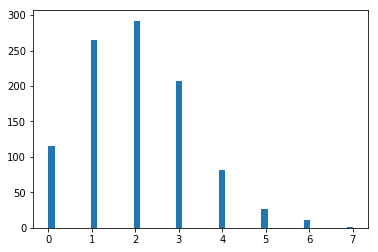

In [76]:
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)
#For n=10 trials and p=0.2 percent success for 1000 samples
samples = binom.rvs(n=10, p=0.2, size=1000)
ax.hist(samples, bins=50); #Silence output to console

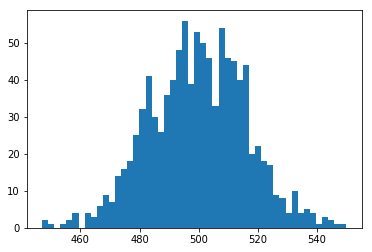

In [78]:
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)
#For n=1000 trials and p=0.5 percent success for 1000 samples
samples = binom.rvs(n=1000, p=0.5, size=1000)
ax.hist(samples, bins=50); #Silence output to console

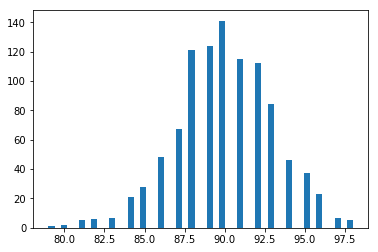

In [79]:
from scipy.stats import binom
fig, ax = plt.subplots(1, 1)
#For n=100 trials and p=0.9 percent success for 1000 samples
samples = binom.rvs(n=100, p=0.9, size=1000)
ax.hist(samples, bins=50); #Silence output to console

### 1C. Hypothetical question

My question is if this is a signal free distribution and I get a measurement, what is the probability that it is signal like? I would define this probability as farther away from the center of the distribution, which I shall set as *loc + mu*.

In [101]:
from scipy.stats import binom

#I shall begin by using an n of 10 and a p of 0.5
n_binom = 10
p_binom = 0.5

measurement= 9 #simulated measurement
probability = binom.cdf(measurement, n=n_binom, p=p_binom)

print(str(100*probability) + "% signal-like")

99.90234375% signal-like


### 1D. Discrete Sigmas

Because the distribution of values is in discrete chunks, naturally the sigmas and probabilities will also be in discrete pieces. This means that an upper and lower cases, we know there will be an upper and lower probability to of any measurement, and an upper and lower sigma value. This means that if we hit these probabilities or sigma values, we can say that we have hit a maximally sure result. 

### 1E. Continous parameters

The outputs of any particular binomial distribution will be in discrete pieces, but the value p can be any continous number. This is because it is the average likely-hood of a successful trial, which would be the average answer after an infinite number of trials and infinite examples of those trials. The numbers that do not change continously are the outputs, because they are directly related to n, and the value of n, since it is the number of trials conducted and therefore has no physical meaning when not an integer.